<a href="https://colab.research.google.com/github/luceldasilva/algebra-lineal-para-ml/blob/main/Algebra_Lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

### Matrices y transformaciones lineales

In [2]:
clase_1 = np.array([[-1,3],[2,-2]])
print(clase_1)

[[-1  3]
 [ 2 -2]]


In [3]:
vector_clase_1 = np.array([[2],[1]])
print(vector_clase_1)

[[2]
 [1]]


In [4]:
%run "/content/drive/MyDrive/Colab Notebooks/funciones_auxiliares/graficarVectores.ipynb"

In [5]:
print(vector_clase_1)
print(vector_clase_1.flatten())

[[2]
 [1]]
[2 1]


In [6]:
print(clase_1)
print(clase_1.flatten())

[[-1  3]
 [ 2 -2]]
[-1  3  2 -2]


(-0.5, 2.0)

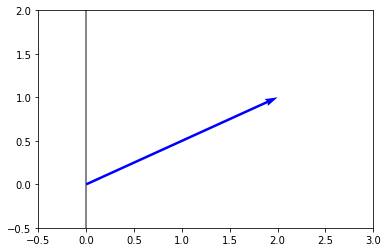

In [7]:
graficarVectores([vector_clase_1.flatten()], cols='blue')
plt.xlim(-0.5, 3)
plt.ylim(-0.5, 2)

In [8]:
vector_trans = clase_1.dot(vector_clase_1)
print(vector_trans)

[[1]
 [2]]


(-0.5, 2.5)

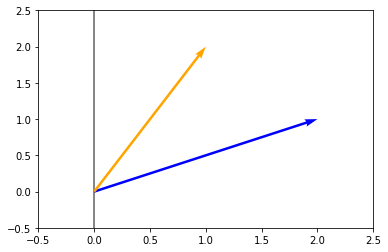

In [9]:
graficarVectores([vector_clase_1.flatten(), vector_trans.flatten()],
                 cols = ['blue', 'orange'])
plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)

In [10]:
print(np.linalg.det(clase_1))

-4.0


In [11]:
print(np.linalg.norm(vector_clase_1))
print(np.linalg.norm(vector_trans))

2.23606797749979
2.23606797749979


## Autovalores y Autovectores

In [12]:
orange_ligth = '#FF9A13'
blue_ligth = '#1190FF'

In [13]:
x = np.array([[3, 2], [4,1]])
print(x)

[[3 2]
 [4 1]]


In [14]:
clase_2 = np.array([[1],[1]])
print(clase_2)

[[1]
 [1]]


In [15]:
u_clase_2 = x.dot(clase_2)
print(u_clase_2)

[[5]
 [5]]


(-1.0, 6.0)

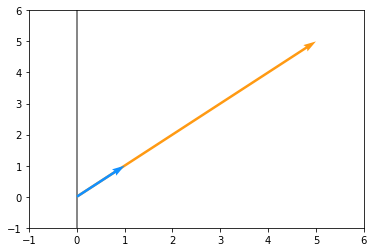

In [16]:
graficarVectores([u_clase_2.flatten(), clase_2.flatten()], cols=[orange_ligth, blue_ligth])

plt.xlim(-1,6)
plt.ylim(-1,6)

In [17]:
lambda_1 = 5

lambda_1 * clase_2

array([[5],
       [5]])

In [18]:
clase_3 = np.array([[-1],[2]])
print(clase_3)

[[-1]
 [ 2]]


In [19]:
t_clase_3 = x.dot(clase_3)
print(t_clase_3)

[[ 1]
 [-2]]


(-3.0, 3.0)

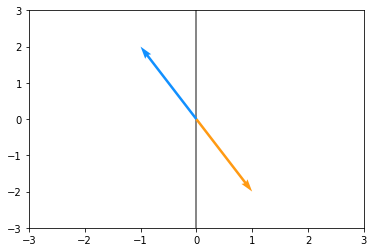

In [20]:
graficarVectores([t_clase_3.flatten(), clase_3.flatten()], cols=[orange_ligth, blue_ligth])

plt.xlim(-3,3)
plt.ylim(-3,3)

### Cómo calcularlos

In [21]:
print(np.linalg.eig(x))

(array([ 5., -1.]), array([[ 0.70710678, -0.4472136 ],
       [ 0.70710678,  0.89442719]]))


In [22]:
autovalores, autovectores = np.linalg.eig(x)
print(autovalores)

[ 5. -1.]


In [23]:
print(autovectores[:, 0])

[0.70710678 0.70710678]


In [24]:
print(autovectores[:, 1])

[-0.4472136   0.89442719]


In [25]:
clase_4 = x.dot(clase_3)

v_np = autovectores[:, 1]

(-7.0, 3.0)

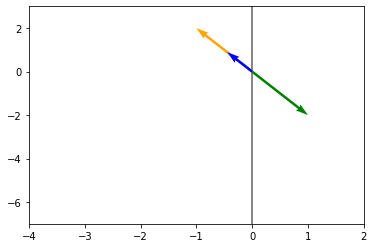

In [26]:
graficarVectores([clase_4.flatten(), clase_3.flatten(), v_np], cols = ['green', 'orange', 'blue'])

plt.xlim(-4,2)
plt.ylim(-7,3)

## Descomposición de matrices

Usando el ejemplo de los autovectores y autovalores de la variable x más arriba

In [27]:
X_calc = autovectores.dot(np.diag(autovalores)).dot(np.linalg.inv(autovectores))

In [28]:
print(X_calc)

[[3. 2.]
 [4. 1.]]


La matriz original de la variable x

In [29]:
clase_5 = np.array([[3,2], [2,3]])
print(clase_5)

[[3 2]
 [2 3]]


Mostrar que *clase_5* es simétrica

In [30]:
print(clase_5 == clase_5.T)

[[ True  True]
 [ True  True]]


In [31]:
autovalores_clase_5, autovectores_clase_5 = np.linalg.eig(clase_5)
print(autovalores_clase_5)
print(autovectores_clase_5)

[5. 1.]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


Calcular transpuesta es más cómodo que la inversa

In [32]:
clase_5_calc = autovectores_clase_5.dot(np.diag(autovalores_clase_5)).dot(autovectores_clase_5.T)
print(clase_5_calc)

[[3. 2.]
 [2. 3.]]


Recuperamos matriz original

### ¿Cómo descompongo una matriz no cuadrada (SVD)?

In [33]:
class_6 = np.array([[1,2,3], [3,4,5]])
print(class_6)

[[1 2 3]
 [3 4 5]]


In [34]:
U, D, V = np.linalg.svd(class_6)
print(U)

[[-0.46410668 -0.88577931]
 [-0.88577931  0.46410668]]


In [35]:
print(D)

[7.97638869 0.61418515]


In [36]:
print(np.diag(D))

[[7.97638869 0.        ]
 [0.         0.61418515]]


In [37]:
print(V)

[[-0.39133557 -0.5605708  -0.72980603]
 [ 0.8247362   0.13817999 -0.54837623]
 [ 0.40824829 -0.81649658  0.40824829]]


## Las tres transformaciones

In [37]:
def graficarMatriz(matriz, vectorCol['red', 'blue']):

  #circulo unitario
  x = np.linspace(-1,1, 100000)
  y = np.sqrt(1-(x**2))

  #circulo unitario transformado
  x1 = matriz[0,0]*x + matriz[0,1]*y
  y1 = matriz[1,0]*x + matriz[1,1]*y
  x1_neg = matriz[0,0]*x - matriz[0,1]*y
  y1_neg = matriz[1,0]*x - matriz[1,1]*y

  #vectores
  u1 = [matriz[0,0], matriz[1,0]]
  v1 = [matriz[0,1], matriz[1,1]]

  graficarVectores([u1, v1], cols=[vectorCol[0], vectorCol[1]])

  plt.plt(x1, y1, 'green', alpha = 0.7)
  plt.plt(x1, y1, 'green', alpha = 0.7)